In [75]:
from SBTS import * 
from schemes import * 
from tools import *
from metrics import * 

We consider the following autoregressive model:
\begin{align*}
\begin{cases}
X_{t_1} = b + \varepsilon_1, \\
X_{t_2} = \beta_1 X_{t_1} + \varepsilon_2, \\
X_{t_3} = \beta_2 X_{t_2} + \sqrt{|X_{t_1}|} + \varepsilon_3,
\end{cases}
\end{align*}
where $\varepsilon_i \sim \mathcal{N}(0, \sigma_i^2)$, $i = 1,2,3$, are mutually independent random variables.

We use the following parameter values:
\begin{align*}
b = 0.7, \qquad
\sigma_1 = 0.1, \qquad
\sigma_2 = \sigma_3 = 0.05, \qquad
\beta_1 = \beta_2 = -1.
\end{align*}

We generate M = 1000 samples from the model above. The drift is estimated using the quartic kernel with bandwidth $h = 0.05$, and the Euler scheme is simulated with an internal discretization $N^\pi = 100$. We set $t_0 = 0$, $t_1 = 7/252$, $t_2 = 14/252$, and $t_3 = 21/252$, corresponding to weekly observations expressed in years.

In [77]:
M = 3000
b = 0.7
sigmas = [0.1, 0.05, 0.05]
betas = [-1, -1]
N_pi = 100
h = 0.05
X = simulate_AR(M, b, sigmas, betas) 
delta = 7/252

### Generation of synthetic trajectories 

In [80]:
vals = simulate_SBTS_trajectories(X, M, h, delta, N_pi, x0=None)

100%|██████████████████████████████████████| 3000/3000 [00:14<00:00, 204.36it/s]


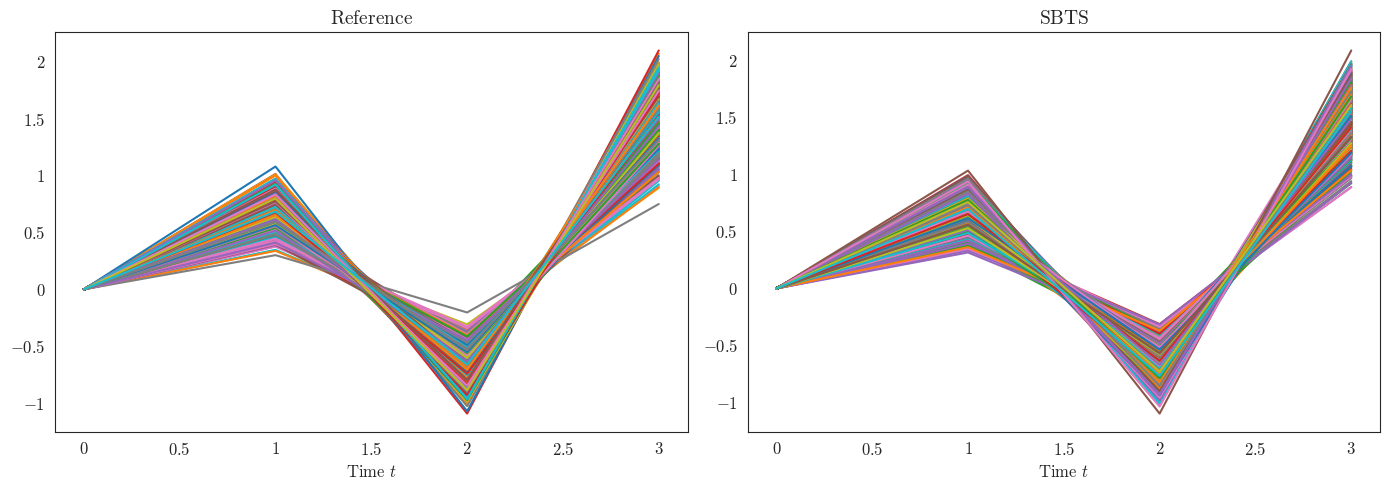

In [82]:
plot_traj_12(X, vals)

### Join marginal distribution 

In [85]:
df_data_SBTS = pd.DataFrame()
df_data_SBTS["X_{t_1}"] = X[:,1].tolist() + vals[:,1].tolist()
df_data_SBTS["X_{t_2}"] = X[:,2].tolist() + vals[:,2].tolist()
df_data_SBTS["X_{t_3}"] = X[:,3].tolist() + vals[:,3].tolist()
df_data_SBTS["type"] = [r"$\text{Reference}$"]* M + [r"$\text{SBTS}$"]* M

In [87]:
x = "X_{t_1}"
y = "X_{t_3}"

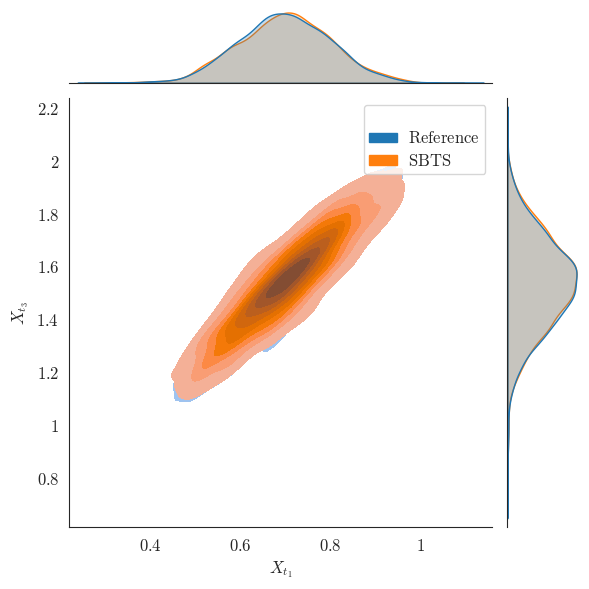

In [89]:
plot_join_marginal_distribution(df_data_SBTS, x, y)

### Kolmogorov-Smirnov test

In [92]:
df = pd.DataFrame(columns = ["p-valeur", "quantile 5% data", "quantile 5% SB", "quantile 95% data", "quantile 95% SB", "mean data", "mean SB", "var data", "var SB"], index = [1,2,3])
for i in df.index : 
    df.loc[i, "p-valeur"] = kstest(rvs = X[:, i], cdf = vals[:, i])[1]
    df.loc[i, "quantile 5% data"] = np.quantile(X[:,i], 0.05)
    df.loc[i, "quantile 5% SB"] = np.quantile(vals[:,i], 0.05)
    df.loc[i, "quantile 95% data"] = np.quantile(X[:,i], 0.95)
    df.loc[i, "quantile 95% SB"] = np.quantile(vals[:,i], 0.95)
    df.loc[i, "mean data"] = np.mean(X[:, i])
    df.loc[i, "mean SB"] = np.mean(vals[:, i])
    df.loc[i, "var data"] = np.var(X[:, i])
    df.loc[i, "var SB"] = np.var(vals[:, i])

In [94]:
df

,p-valeur,quantile 5% data,quantile 5% SB,quantile 95% data,quantile 95% SB,mean data,mean SB,var data,var SB
1,0.405632,0.533114,0.527362,0.860856,0.869501,0.69791,0.699845,0.010356,0.010716
2,0.442933,-0.883413,-0.88387,-0.515497,-0.513651,-0.698103,-0.701688,0.012462,0.012789
3,0.502174,1.238365,1.237918,1.816079,1.81685,1.531463,1.536449,0.030753,0.031056


### Correlation matrix 

In [97]:
data_corr = np.corrcoef(X[:, 1:].T)
SBTS_corr = np.corrcoef(vals[:, 1:].T)

In [99]:
(data_corr - SBTS_corr).round(3)

array([[ 0.   , -0.021,  0.013],
       [-0.021,  0.   , -0.015],
       [ 0.013, -0.015, -0.   ]])

### Quadratic variation 

In [102]:
quadratic_var_X = np.power(np.diff(X), 2).sum(axis = 1)
quadratic_var_SBTS = np.power(np.diff(vals), 2).sum(axis = 1)

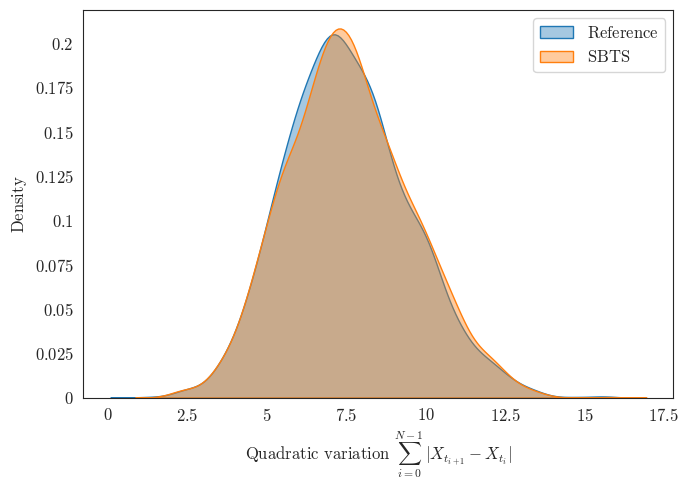

In [104]:
plot_quadratic_variation(quadratic_var_X, quadratic_var_SBTS)

### Discriminative & Predictive Score. 

In [10]:
discriminative_scores, predictive_scores = scores(X, vals, col_pred = None, 
                                                  iterations = 2000, n_temp = 10, min_max = True, both = False)

100%|███████████████████████████████████████████| 10/10 [00:33<00:00,  3.31s/it]

Discriminative score : 0.013 +- 0.007
Predictive score : 0.0 +- 0.0
